In [2]:
from matplotlib import rc
%matplotlib notebook
from lmfit import Model
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator)
import pandas as pd
from PIL import Image


In [3]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage[utf8]{inputenc}  \usepackage[T1]{fontenc} \usepackage[ngerman]{babel} \usepackage[sorting=none]{biblatex} \usepackage{hyperref} \usepackage{amsmath} \usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[ngerman]{babel} \usepackage{hyperref} \usepackage[sorting=none]{biblatex} \usepackage{amsmath} \usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [4]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)
    

In [5]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, LogLocator,FormatStrFormatter, FuncFormatter)

In [6]:
capture_nr, exposure_sec, sigma, mean =  np.loadtxt("dark_auswertung_02032022/20220302_dark_data.csv", delimiter=",", unpack=True)




In [ ]:
%matplotlib inline
#grob
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
plt.subplots_adjust(hspace =0.6)
axes = axs
axes.set_xlim((0.9e-7,1.1e-3))
axes.set_ylim((18, 48))
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'Belichtungszeit $\tau$ in s')
axes.set_xscale('log')
axes.set_ylabel(r"Standardabweichung $\sigma$ in ADU")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(MultipleLocator(200))
# axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
axes.errorbar(exposure_sec, sigma, fmt="o", ms=2)

In [ ]:
fig.savefig('noise.pgf', bbox_inches='tight', pad_inches=0.0)

In [ ]:
%matplotlib inline
#grob
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
plt.subplots_adjust(hspace =0.6)
axes = axs
axes.set_xlim((0.9e-7,1.1e-3))
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'exposure / s')
axes.set_xscale('log')
axes.set_ylabel(r"standard deviation $\sigma$ / ADU")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(MultipleLocator(200))
# axes.xaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
axes.errorbar(exposure_sec, sigma, fmt="o", ms=2)

In [ ]:
fig.savefig('noise_moench_engl.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

In [ ]:
%matplotlib inline
#grob
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
plt.subplots_adjust(hspace =0.6)
axes = axs
axes.set_xlim((0.9e-7,1.1e-3))
axes.set_ylim((17, 52))
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'Belichtungszeit $\tau$ in s')
axes.set_xscale('log')
axes.set_ylabel(r"Standardabweichung $\sigma$ in ADU")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(MultipleLocator(200))
# axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
axes.errorbar(exposure_sec, sigma, fmt="o", ms=2)

adu_ticks = (20,25,30,35,40,45,50)
axes.yaxis.set_ticks(adu_ticks)
# axes.yaxis.set_major_locator(MultipleLocator(50))

e_ticks = list((np.array(adu_ticks)/0.151)/3.66)


def adu2e(x):
    return (x/0.151)/3.66


def e2adu(x):
    return x*366*0.151


secax = axes.secondary_yaxis('right', functions=(adu2e, e2adu))
#secax.set_ticks(e_ticks)
secax.set_ylabel('Standardabweichung $\sigma$ in e$^-$')


In [ ]:
%matplotlib inline
#grob
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
plt.subplots_adjust(hspace =0.6)
axes = axs
axes.set_xlim((0.9e-7,1.1e-3))
axes.set_ylim((17, 52))
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'Belichtungszeit $\tau$ in s')
axes.set_xscale('log')
axes.set_ylabel(r"Standardabweichung $\sigma$ in ADU")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(MultipleLocator(200))
# axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
axes.errorbar(exposure_sec, sigma, fmt="o", ms=2)

adu_ticks = (20,25,30,35,40,45,50)
axes.yaxis.set_ticks(adu_ticks)
# axes.yaxis.set_major_locator(MultipleLocator(50))

e_ticks = list((np.array(adu_ticks)/0.151)/3.66)


def adu2e(x):
    return (x/0.151)/3.66


def e2adu(x):
    return x*366*0.151


secax = axes.secondary_yaxis('right', functions=(adu2e, e2adu))
secax.set_ticks(e_ticks)
secax.set_ylabel('Standardabweichung $\sigma$ in e$^-$')


In [ ]:
def noise_fit(x, a, b):
    return np.sqrt(a*np.abs(x))+b

def noise_fit_linear(x,a,b,c):
    return np.sqrt(a*np.abs(x))+ x*c + b 

root_model = Model(noise_fit_linear)
root_model.set_param_hint('b', vary=True)
root_model.set_param_hint('a', vary=True)

params = root_model.make_params(a=0.06, b=18.72, c=0.2)
print(params)
result = root_model.fit(sigma, params, x=(exposure_sec*1e6))
print(result.fit_report())

In [ ]:
%matplotlib notebook
#grob
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
plt.subplots_adjust(hspace =0.6)
axes = axs
axes.set_xlim((-1e-4,1.1e-3))
axes.set_ylim((17, 52))
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'Belichtungszeit $\tau$ in s')
#axes.set_xscale('log')
axes.set_ylabel(r"Standardabweichung $\sigma$ in ADU")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_locator(LogLocator(10))

axes.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
axes.errorbar(exposure_sec, sigma, fmt="o", ms=2, label='measured data')

axes.plot(exposure_sec, root_model.eval(x=exposure_sec*1e6, a=0.0605, b=18.72, c=0), label='fit from paper $\sqrt{a\\tau} + b$\nwith a = 0.2e-$^2$/$\mu s$ = 0.0605 ADU$^{2}$/$\mu s$\nand b=34.3e- = 18.865 ADU')
adu_ticks = (20,25,30,35,40,45,50)
axes.yaxis.set_ticks(adu_ticks)
#axes.ticklabel_format(axis='x', style='sci')
axes.plot(exposure_sec, result.best_fit, label='fit $\sqrt{a\\tau} + b$\nwith a = 1.52e-$^2$/$\mu s$ = 0.459 ADU$^{2}$/$\mu s$\nand b=34.3e- = 18.865 ADU (fixed)')
fig.legend()


# axes.yaxis.set_major_locator(MultipleLocator(50))

e_ticks = list((np.array(adu_ticks)/0.151)/3.66)


def adu2e(x):
    return (x/0.151)/3.66


def e2adu(x):
    return x*366*0.151

secax = axes.secondary_yaxis('right', functions=(adu2e, e2adu))
secax.set_ticks(e_ticks)
secax.set_ylabel('Standardabweichung $\sigma$ in e$^-$')


In [ ]:
fig.savefig('fits.jpg', dpi=300)

Page width: 6.49733inch

In [ ]:
plt.rcParams.update({
    "figure.figsize": (3.24, 2.75)})

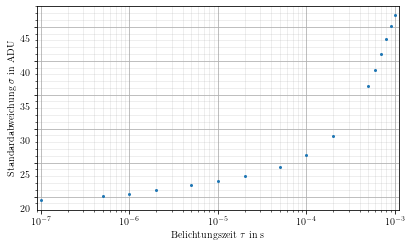

In [30]:
%matplotlib inline
#grob
fig, axs = plt.figure(), plt.gca()
fig.set_size_inches(6.48, 3.75)
#fig.suptitle('MOENCH detector characteristics')
axes = axs
axes.set_xlim((0.9e-7,1.1e-3))
axes.set_ylim((18, 48))
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'Belichtungszeit $\tau$ in s')
axes.set_xscale('log')
axes.set_ylabel(r"Standardabweichung $\sigma$ in ADU")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(MultipleLocator(200))
# axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
axes.errorbar(exposure_sec, sigma, fmt="o", ms=2)
fig.savefig('noise_half_width.pgf', bbox_inches='tight', pad_inches=0.0)

In [7]:
def adu2e(x):
    return (x/0.151)/3.66

In [8]:
def sci_notation(number, sig_fig=2):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a, b = ret_string.split("e")
    # remove leading "+" and strip leading zeros
    b = int(b)
    return a + " * 10^" + str(b)

In [9]:
x_fit = np.linspace(0,1e-3, 100)
y_fit = np.sqrt(0.2*x_fit*1e6)+34.3

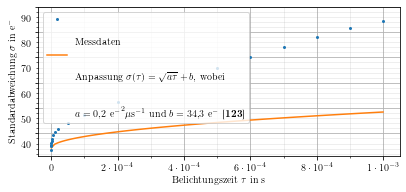

In [11]:
%matplotlib inline
#grob
sigma_e = adu2e(sigma)
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
fig.set_size_inches(6.48, 2.75)
axes = axs
axes.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%.0e}" % x if x != 0 else "0"))
axes.set_xlim(left= -0.4e-4,right=1.05e-3)
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'Belichtungszeit $\tau$ in s')
#axes.set_xscale('log')
axes.set_ylabel(r"Standardabweichung $\sigma$ in e$^-$")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(MultipleLocator(200))
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.set_ylim(bottom=31, top=90)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))

# axes.yaxis.set_major_locator(MultipleLocator(50))
messdaten = axes.errorbar(exposure_sec, sigma_e, fmt="o", ms=2, label="Messdaten")
fit_plt, = axes.plot(x_fit, y_fit)
axes.legend([messdaten, fit_plt, matplotlib.lines.Line2D([], [], color="none")], [r"Messdaten", r"Anpassung $\sigma(\tau) = \sqrt{a\tau}+b$, wobei", r"$a=\num{0,2}$ e${^-}^2\mu \text{s}^{-1}$ und $b=\num{34.3}$ e${^-}$ \cite{123}"])
#\cite{ramilli_measurements_2017}
fig.savefig('noise_fit_half_width.pgf', bbox_inches='tight', pad_inches=0.0)

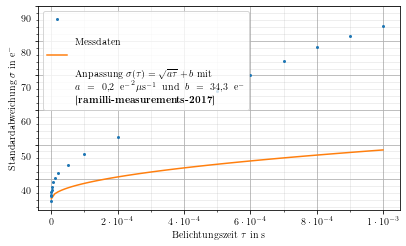

In [28]:
%matplotlib inline
#grob
sigma_e = adu2e(sigma)
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
fig.set_size_inches(6.48, 3.75)
axes = axs
axes.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%.0e}" % x if x != 0 else "0"))
axes.set_xlim(left= -0.4e-4,right=1.05e-3)
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'Belichtungszeit $\tau$ in s')
#axes.set_xscale('log')
axes.set_ylabel(r"Standardabweichung $\sigma$ in e$^-$")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(MultipleLocator(200))
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.set_ylim(bottom=31, top=90)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))

# axes.yaxis.set_major_locator(MultipleLocator(50))
messdaten = axes.errorbar(exposure_sec, sigma_e, fmt="o", ms=2, label="Messdaten")
fit_plt, = axes.plot(x_fit, y_fit, label = "\\parbox{6cm}{Anpassung $\\sigma(\\tau) = \\sqrt{a\\tau}+b$ mit\\\\ $a=\\num{0,2}$ e${^-}^2\\mu \\text{s}^{-1}$ und $b=\\num{34.3}$ e${^-}$ \\cite{ramilli-measurements-2017}}")
#axes.legend([messdaten, fit_plt, matplotlib.lines.Line2D([], [], color="none")], [r"Messdaten", ])
#\cite{ramilli_measurements_2017}
handles, labels = fig.gca().get_legend_handles_labels()
order = [1,0]
axes.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
fig.savefig('noise_fit_half_width_test.pgf', bbox_inches='tight', pad_inches=0.0)

In [21]:
import matplotlib; print(matplotlib.__version__)

3.5.1
